In [10]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy as scs
import matplotlib.pyplot as plt

train = pd.read_csv(r'C:\Users\kmoudgalya\Desktop\Pork Price Prediction Challenge\FoodPriceIndexData_Updated\MRDS_Index_Data_D_Labs_Training_Updated.csv', index_col = ['Date'], parse_dates = ['Date'])
train.dropna(inplace=True)
train.astype(np.float)
train = train.Ham_Index
train

Date
2007-01-01    172.747
2007-02-01    170.358
2007-03-01    176.106
2007-04-01    169.135
2007-05-01    176.349
2007-06-01    179.754
2007-07-01    181.689
2007-08-01    181.990
2007-09-01    182.777
2007-10-01    182.936
2007-11-01    180.889
2007-12-01    175.954
2008-01-01    176.625
2008-02-01    173.400
2008-03-01    173.875
2008-04-01    181.260
2008-05-01    178.318
2008-06-01    179.421
2008-07-01    184.665
2008-08-01    185.925
2008-09-01    189.218
2008-10-01    194.328
2008-11-01    189.969
2008-12-01    185.401
2009-01-01    186.741
2009-02-01    184.727
2009-03-01    187.811
2009-04-01    176.971
2009-05-01    181.982
2009-06-01    182.422
               ...   
2014-12-01    225.163
2015-01-01    223.955
2015-02-01    225.557
2015-03-01    224.192
2015-04-01    211.320
2015-05-01    213.419
2015-06-01    213.794
2015-07-01    213.388
2015-08-01    215.852
2015-09-01    217.486
2015-10-01    218.647
2015-11-01    208.510
2015-12-01    201.479
2016-01-01    201.281
2016-

In [4]:
train['Date'] = pd.to_datetime(train.Date, format = '%Y-%m-%d')

AttributeError: 'Series' object has no attribute 'Date'

In [5]:
train

Date
2007-01-01    172.747
2007-02-01    170.358
2007-03-01    176.106
2007-04-01    169.135
2007-05-01    176.349
2007-06-01    179.754
2007-07-01    181.689
2007-08-01    181.990
2007-09-01    182.777
2007-10-01    182.936
2007-11-01    180.889
2007-12-01    175.954
2008-01-01    176.625
2008-02-01    173.400
2008-03-01    173.875
2008-04-01    181.260
2008-05-01    178.318
2008-06-01    179.421
2008-07-01    184.665
2008-08-01    185.925
2008-09-01    189.218
2008-10-01    194.328
2008-11-01    189.969
2008-12-01    185.401
2009-01-01    186.741
2009-02-01    184.727
2009-03-01    187.811
2009-04-01    176.971
2009-05-01    181.982
2009-06-01    182.422
               ...   
2014-12-01    225.163
2015-01-01    223.955
2015-02-01    225.557
2015-03-01    224.192
2015-04-01    211.320
2015-05-01    213.419
2015-06-01    213.794
2015-07-01    213.388
2015-08-01    215.852
2015-09-01    217.486
2015-10-01    218.647
2015-11-01    208.510
2015-12-01    201.479
2016-01-01    201.281
2016-

In [6]:
def tsplot(y, lags=None, figsize=(10,8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize = figsize)
        layout = (3,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        qq_ax = plt.subplot2grid(layout, (2,0))
        pp_ax = plt.subplot2grid(layout, (2,1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.stats.probplot(y, sparams = (y.mean(), y.std()), plot = pp_ax)
        
        plt.tight_layout()
    return

C:\Users\kmoudgalya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


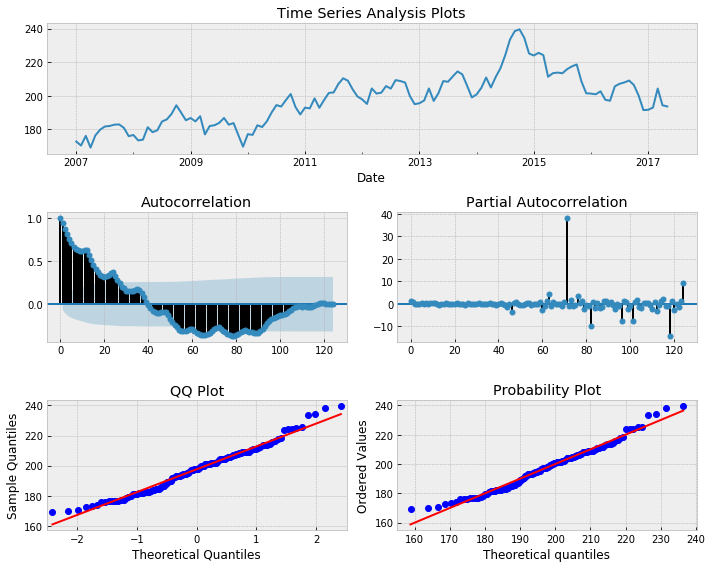

In [13]:
_ = tsplot(train)

In [16]:
train.to_csv(r'C:\Users\kmoudgalya\Desktop\Pork Price Prediction Challenge\FoodPriceIndexData_Updated\Train.csv')

In [ ]:
#manually entered column headers in excel

In [27]:
train = pd.read_csv(r'C:\Users\kmoudgalya\Desktop\Pork Price Prediction Challenge\FoodPriceIndexData_Updated\Train.csv')
train

,ds,y
0,1/1/2007,172.747
1,2/1/2007,170.358
2,3/1/2007,176.106
3,4/1/2007,169.135
4,5/1/2007,176.349
5,6/1/2007,179.754
6,7/1/2007,181.689
7,8/1/2007,181.990
8,9/1/2007,182.777
9,10/1/2007,182.936


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kmoudgalya\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


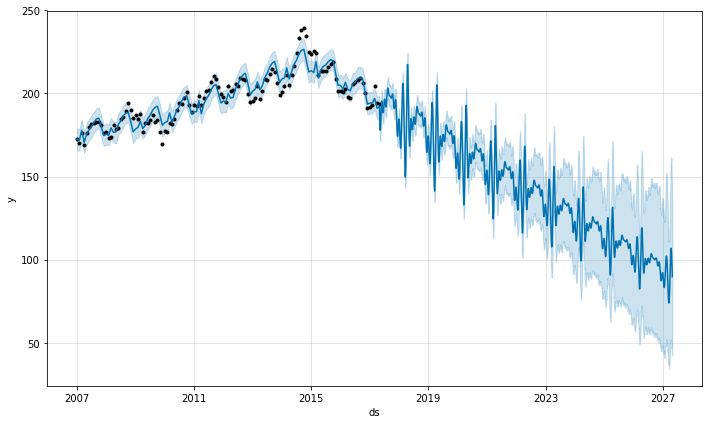

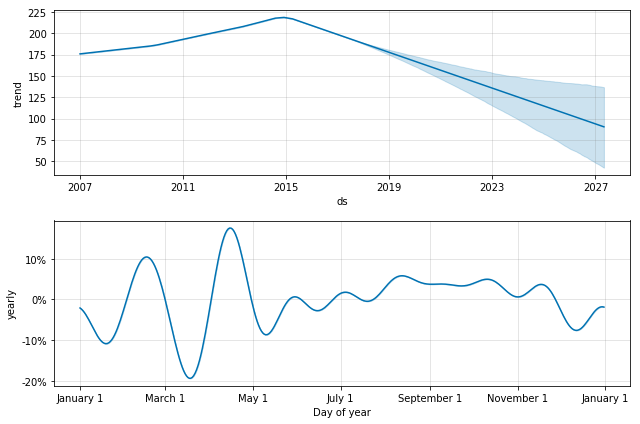

In [33]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)
future = m.make_future_dataframe(periods = 3652)
fcst = m.predict(future)
fig = m.plot(fcst)
fig2 = m.plot_components(fcst)